<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/Klasterizavimas_Eksperimentai_su_isuic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means klasterizavimo algoritmas
## Demo su dirbtiniais duomenimis

Trumpai paliesim klasterizavimą su dirbtiniais duomenimis, adaptuojam pavyzd5 iš https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

Klasterių generavimui naudojam https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

No handles with labels found to put in legend.


Automatically created module for IPython interactive environment


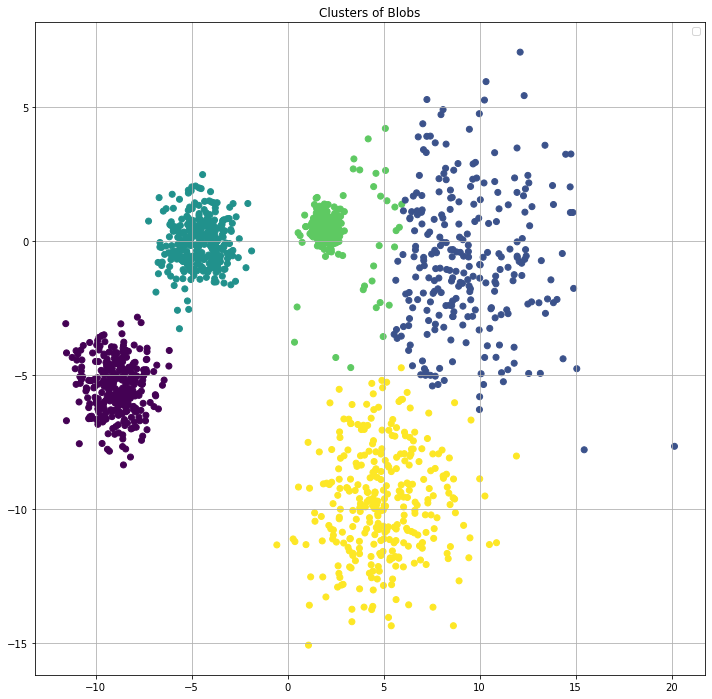

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
# nurodom sklaidą klasteriuose
c_std=[1,1,0.4,2,3]
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5,n_features=2,cluster_std=c_std)

# Number of clusters
k=5
kmeans = KMeans(n_clusters=k, random_state=random_state)
y_pred = kmeans.fit_predict(X)

#plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clusters of Blobs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
kmeans.cluster_centers_

array([[-8.91004847, -5.42369297],
       [ 9.42480001, -0.74452327],
       [-4.58629259, -0.04045132],
       [ 2.1454525 ,  0.44362019],
       [ 4.977988  , -9.75796636]])

In [ ]:
y_pred

array([2, 3, 1, ..., 2, 4, 0], dtype=int32)

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 3, 2, 2], dtype=int32)

Klasteriai sudalina erdvę į regionus. Šis sudalinimas vadinasi "Voronoi tesselation" . Čia - kaip vizualizuoti Voronoi tesselation : https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.Voronoi.html 

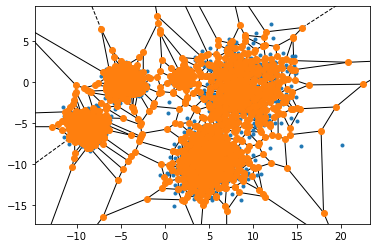

In [ ]:
# bandykim vizualizuoti savo klasterius
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(X)
voronoi_plot_2d(vor)
plt.show()

Netinka šitas pavyzdys. Sprendimų paviršių vizualizavimas nėra paprastas uždavinys. Pasinaudokim https://stackoverflow.com/questions/19054923/plot-decision-boundary-matplotlib

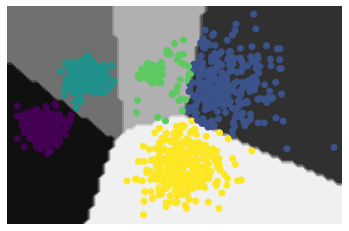

In [ ]:
h=0.5
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,h),
                     np.arange(y_min, y_max,h))

# here "model" is your model's prediction (classification) function
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z,cmap='gray')
plt.axis('off')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1],c=y_pred)

K-means algoritmas sugrupuoja taškus į klasterius taip, kad jie būtų arčiausiai savo klasterio centro. Jeigu klasteriai persidengia, tuomet kai kurie taškai priskiriami ne savo klasteriui. Kartais naudinga suskaičiuoti taškų nuotolį nuo klasterių centrų

In [ ]:
kmeans.transform(X_new)
# stulpeliai klasteriai, eilutes duomenu taskai

array([[11.59742131,  9.81627542,  5.01971327,  2.65052533, 12.76832555],
       [14.03426065,  6.98644853,  7.85590713,  1.77554767, 11.9231795 ],
       [10.29015434, 12.97679119,  3.4293831 ,  5.74549904, 15.04705945],
       [ 9.88501812, 12.8414402 ,  2.99503207,  5.54115325, 14.62552672]])

K-means algoritmo principas iteratyviai rasti klasterių centrų išdėstymą atžvilgiu dauomenų taškų taip kad atstumai tarp taškų ir jų klasterio centro būų mažiausi. Jeigu duomenyse egzistuoja aiškūs klasteriai, paprastutis K-means visada ras teisingą sprendimą. 
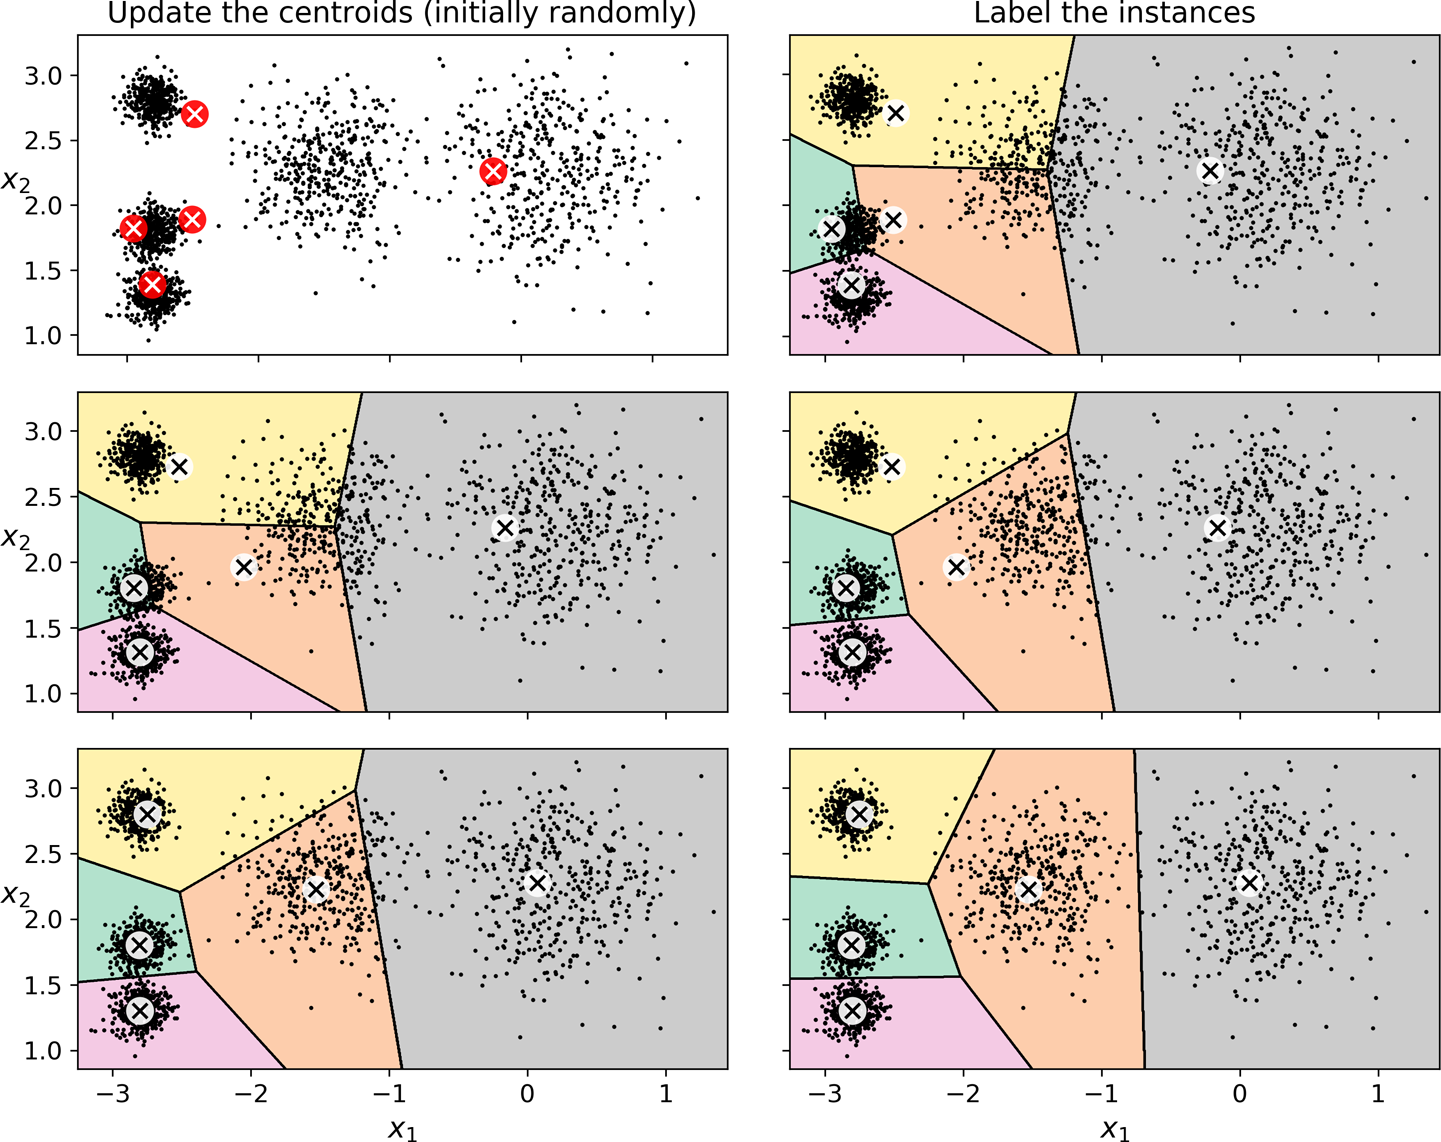

Grafikas iš Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron Published by O'Reilly Media, Inc., 2019

Galim žinoti apytiksliai kur yra centrai ir inicializuoti algoritmą ir padėti jam greičiau konverguoti

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
y_pred = kmeans.fit_predict(X)

In [ ]:
kmeans.cluster_centers_

array([[ 9.46009462, -0.73362717],
       [-4.58629259, -0.04045132],
       [-8.91004847, -5.42369297],
       [ 4.98622667, -9.74394481],
       [ 2.16777623,  0.44215406]])

Klasterizavimo gerumo kriterijus - inertia_ tai yra taškų atstumų nuo jų artimiausių centrodų kvadratų vidurkis. 

In [ ]:
kmeans.inertia_

7484.306317253611

In [ ]:
kmeans = KMeans(n_clusters=5, n_init=100)
y_pred = kmeans.fit_predict(X)
kmeans.inertia_

7483.726008650341

In [ ]:
inertia=np.zeros(shape=(1,10))
kn=np.zeros(shape=(1,10))
for k in [0,1,2,3,4,5,6,7,8,9]:
    kmeans = KMeans(n_clusters=k+1, n_init=100)
    y_pred = kmeans.fit_predict(X)
    print("clusters: ",k+1, "inertia: ",kmeans.inertia_)
    inertia[0,k]=kmeans.inertia_
    kn[0,k]=k+1

clusters:  1 inertia:  93163.69358178042
clusters:  2 inertia:  41607.355962998525
clusters:  3 inertia:  22303.24312023705
clusters:  4 inertia:  14207.225998783866
clusters:  5 inertia:  7483.726008650341
clusters:  6 inertia:  6237.150405846807
clusters:  7 inertia:  5319.800109348576
clusters:  8 inertia:  4622.80507934358
clusters:  9 inertia:  4042.1389749182017
clusters:  10 inertia:  3683.382079962451


Metriką inertia galim panaudoti klasterių skaičiaus nustatymui - kaip? 

Text(0, 0.5, 'inertia')

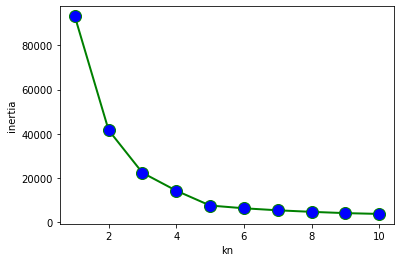

In [83]:
plt.plot(kn[0,:],inertia[0,:],color='green', marker='o', markerfacecolor='blue',linestyle='solid', linewidth=2, markersize=12)
plt.xlabel('kn')
plt.ylabel('inertia')

#DBSCAN klasterizavimo algoritmas

Algoritmo klasterizavimo principas paremtas taškų kaimynyste ir tankumu. Kaip DBSCAN veikia:


*   Kiekvienam taškui algoritmas suskaičiuoja kiek taškų yra aplink tą tašką mažu epsilon atstumu nuo jo. Šis regionas/erdvė vadinamas epsilon-kaimynyste.
*   Jeigu taškas turi mažiausiai min_skaičių_taškų savo epsilon-kaimynystėje, tai toks taškas laikomas esminiu tašku. Esminiai taškai yra tankiuose regionuose/erdvėse. 
*   Visi taškai esminio taško kaimynystėje priklauso tam pačiam klasteriui. Kaimynystė gali įjungti ir kitus esminius taškus. Tad ilga eilė kaimyninių esminių taškų sudaro vieną klasterį.
*   Bet kuris taškas kuris ne esminis ir neturi esminio taško savo kaimynystėje yra laikomas išskirtimi. 

DBSCAN gerai veikia kada yra tankūs susigrupavimai ir jie gerai atskirti mažio tankio regionais. 



In [84]:
# Demo naudojami duomenys yra moons
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Kas per duomenys yra moons

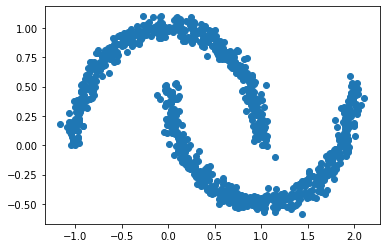

In [ ]:
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
dbscan.labels_

In [ ]:
dbscan.core_sample_indices_

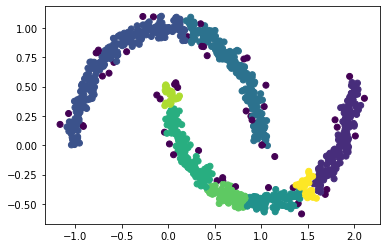

In [96]:
plt.scatter(X[:, 0], X[:, 1],c=dbscan.labels_)

Pakeiskime taškų epsilon-kaimynystę


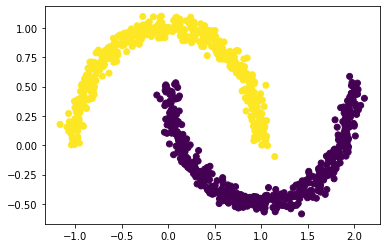

In [97]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
plt.scatter(X[:, 0], X[:, 1],c=dbscan.labels_)

DBSCAN algoritmas neturi prognozės metodo, todėl mes naudijam artimiausių kaimynų klasifikatorių tam kad pasinaudoti DBCSAN rastomis klasėmis

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Dabar galime naudoti DBSCAN klasterizavimo rezultatą prognozuoti kuriam klasteriui priklausys nematyti taškai ir suskaičiuoti taško priklausomybės klasei tikimybę 

# Realūs duomenys 

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)
knn.predict_proba(X_new)

In [ ]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/erinijapranckeviciene/MLdata/main/Kaggle-data-suic.csv"
data = pd.read_csv(url)

In [ ]:
print(data.dtypes)
#print(type(data)))

In [ ]:
data['generation'].value_counts()


In [ ]:
data['country'].value_counts()
data['country'].unique()

In [ ]:
data['age'].value_counts()

Prieš pradedant darbą visada reikia patikrinti su kokiais duomenimis dirbam ar viskas gerai, 

In [ ]:
data.describe(include=['int','int64','float','object'])

country-year yra kategorinis kintamasisi kuris trukdys
taip pat country, šiuos kintamuosius iškeliam į kitus ir pašalinam iš duomenų matricos

In [ ]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [ ]:
data.columns=['country','year', 'sex', 'age', 'suicides_no', 'population','suicides_per_100k','country_year','HDI_for_year','ggdp_for_year','gdp_per_capita','generation']
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_per_100k', 'country_year', 'HDI_for_year', 'ggdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')


blogus kintamuosius pasalinam. Klasterizavimui paliekam country, nes tai svarbus kintamasis. Mes bandysim pastebėti atitikimą tarp savižydybių dinamikos ir tarp šalių. 

In [ ]:
data_new=data.drop(['country_year','ggdp_for_year','HDI_for_year'], axis=1)
country=data.country
#print(country)

Pabandyti seaborn įvairiais atvaizdavimo būdais
https://seaborn.pydata.org/examples/horizontal_boxplot.html 

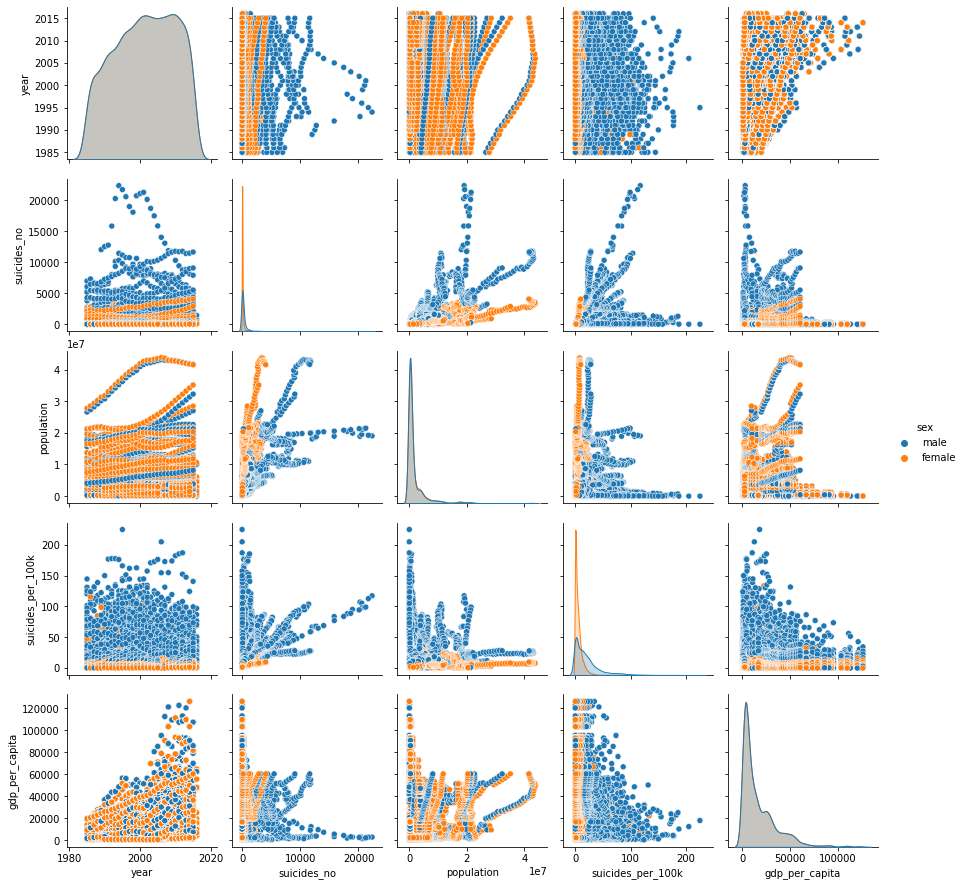

In [ ]:
import seaborn as sns
sns.pairplot(data_new, hue="sex" )

Kategorinius kintamuosius sex, age, generation, reikia perkoduoti taip, kad jie tiktų klasifikavimui ir regresijai. Panaudojam "one hot encoding" . 

In [ ]:
data_dummies=pd.get_dummies(data_new)
list(data_dummies.columns)

['year',
 'suicides_no',
 'population',
 'suicides_per_100k',
 'gdp_per_capita',
 'country_Albania',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Aruba',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Cabo Verde',
 'country_Canada',
 'country_Chile',
 'country_Colombia',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Denmark',
 'country_Dominica',
 'country_Ecuador',
 'country_El Salvador',
 'country_Estonia',
 'country_Fiji',
 'country_Finland',
 'country_France',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Grenada',
 'country_Guatemala',
 'country_Guyana',
 'country_Hungary',
 'country_Iceland',
 'country_Ireland',
 'country_Israel',


Country gal panaudosim vėliau pasižymėti klasteriams.

In [ ]:
#data_ready=pd.concat([country,data_dummies], axis=1)
#data_ready.head()

Pasižiūrim reikšmių pasiskirstymus

In [ ]:
data_dummies.describe()

,year,suicides_no,population,suicides_per_100k,gdp_per_capita,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Denmark,country_Dominica,country_Ecuador,country_El Salvador,country_Estonia,country_Fiji,country_Finland,country_France,country_Georgia,...,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,...,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414,0.009490,0.011646,0.013372,0.010712,0.006039,0.012940,0.013731,0.006902,0.009921,0.009058,0.010784,0.009058,0.013372,0.012078,0.000863,0.013372,0.012940,0.000431,0.012509,0.013372,0.013372,0.012940,0.009418,0.010352,0.006398,0.011574,0.009490,0.000431,0.013372,0.010352,0.009058,0.004745,0.012509,0.012940,0.009490,...,0.011646,0.001294,0.012078,0.010784,0.001294,0.007764,0.007764,0.013372,0.009490,0.009058,0.008627,0.013372,0.004745,0.012078,0.012868,0.009058,0.012006,0.011646,0.003019,0.012509,0.012078,0.002588,0.013372,0.013372,0.012078,0.009490,0.500000,0.500000,0.166858,0.166858,0.166858,0.165708,0.166858,0.166858,0.179367,0.098634,0.230338,0.052840,0.210065,0.228756
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472,0.096953,0.107290,0.114862,0.102943,0.077476,0.113019,0.116375,0.082790,0.099110,0.094744,0.103285,0.094744,0.114862,0.109235,0.029359,0.114862,0.113019,0.020765,0.111144,0.114862,0.114862,0.113019,0.096588,0.101220,0.079734,0.106962,0.096953,0.020765,0.114862,0.101220,0.094744,0.068720,0.111144,0.113019,0.096953,...,0.107290,0.035950,0.109235,0.103285,0.035950,0.087774,0.087774,0.114862,0.096953,0.094744,0.092481,0.114862,0.068720,0.109235,0.112709,0.094744,0.108913,0.107290,0.054867,0.111144,0.109235,0.050808,0.114862,0.114862,0.109235,0.096953,0.500009,0.500009,0.372856,0.372856,0.372856,0.371825,0.372856,0.372856,0.383667,0.298175,0.421057,0.223717,0.407362,0.420040
min,1985.000000,0.000000,

Kokius klausimus galėtume paklausti turėdami šiuos duomenis? Kas mūsų "Target"? Turbūt klasterinė analizė turėtų mums padėt ištirti kaip mūsų duomenys natūraliai grupuojasi.  

Pirma pabandykim pritaikyti matumo sumažinimo operaciją su Principinėmis komponentėmis PCA pagal pavyzdį https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
X=data_dummies
y=country
pca= PCA()
X_r=pca.fit(X).transform(X)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [9.99976809e-01 2.31578722e-05 3.29830879e-08 2.00622237e-11
 4.13915255e-12 2.89625458e-14 2.10654868e-14 1.83179408e-14
 1.58133949e-14 1.20034138e-14 1.09509112e-14 9.00292516e-15
 6.80031197e-15 4.28108522e-15 2.39578130e-15 8.97329351e-16
 8.95821133e-16 8.95458225e-16 8.91948892e-16 8.73861403e-16
 8.73861403e-16 8.73861403e-16 8.73861403e-16 8.73861403e-16
 8.73861403e-16 8.73861403e-16 8.73861403e-16 8.73861403e-16
 8.73861403e-16 8.73861403e-16 8.73861403e-16 8.73861403e-16
 8.73861403e-16 8.66405260e-16 8.60951872e-16 8.56913652e-16
 8.51617508e-16 8.45697051e-16 8.45671021e-16 8.45594626e-16
 8.43673379e-16 8.41342495e-16 8.39899548e-16 8.28375813e-16
 8.20440766e-16 8.17386208e-16 8.16475014e-16 8.09783949e-16
 7.89491081e-16 7.89308772e-16 7.89190074e-16 7.87661484e-16
 7.84720481e-16 7.82612629e-16 7.72054423e-16 7.61665453e-16
 7.61093380e-16 7.59204788e-16 7.54775180e-16 7.43307241e-16
 7.36265951e-16 7.32244214e-16 7.301

[-15467.55760764 -15465.63141634 -15458.42876631 ... -14918.67350337
 -14867.28842957 -14397.81296961]


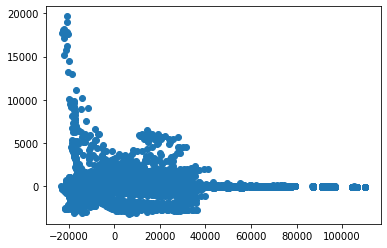

In [ ]:
print(X_r[:,1])
plt.scatter(X_r[:,1],X_r[:,2])
plt.show()

Išbandykim DBSCAN algoritmą pagal pavyzdį https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [ ]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

Xscaled = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(Xscaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)


[-1 -1 -1 ... -1 -1 -1]
